# Identifying Flower Species using Deep Learning and PyTorch



#### We are going to do it in the following steps:

1. Pick a dataset
2. Download the dataset
3. Import the dataset using PyTorch
4. Explore the dataset
5. Prepare the dataset for training
6. Move the dataset to the GPU
7. Define a Neural Network
8. Train the model
9. Make predictions on sample images. Iterate on it with different networks & hyperparameters


### Download the dataset

Using `opendatasets` and download the dataset from https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

Here we are pasting the URL of the kaggle dataset `flower-recognition`

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  davesrivastava


Your Kaggle Key:

  ································


100%|██████████| 225M/225M [00:03<00:00, 62.3MB/s] 


### IMPORTING DATASET USING ***PyTorch***

In [5]:
data_dir = './flowers-recognition/flowers'

In [6]:
import os

##### Here we are showing the list of classes in this dataset we have for this Classification problem.
This also refer to the type of flower images given to us in the folder.

In [7]:
os.listdir(data_dir)

['dandelion', 'tulip', 'rose', 'daisy', 'sunflower']

In [8]:
for cls in os.listdir(data_dir):
  print(cls, ":", len(os.listdir(data_dir + '/'+ cls)))

dandelion : 1052
tulip : 984
rose : 784
daisy : 764
sunflower : 733


Use the `ImageFolder` class from `torchvision`

In [9]:
!pip install jovian --quiet

In [117]:
import jovian

from torchvision.datasets import ImageFolder

dataset = ImageFolder(data_dir)

In [13]:
len(dataset)

4317

In [14]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263>, 0)

In [15]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Let us view the image number 1 which is at index 0

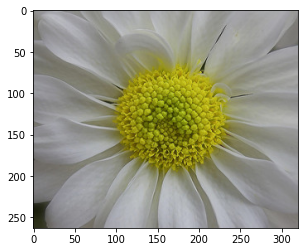

In [17]:
img, label = dataset[0]
plt.imshow(img)

### TENSOR TRANSFORMATION
In this step, Image Data is being converted into a PyTorch Tensor. 

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [18]:
import torchvision.transforms as tt
dataset =ImageFolder(data_dir, tt.Compose([tt.Resize(64), tt.RandomCrop(64), tt.ToTensor()]))

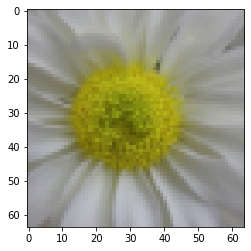

In [19]:
img, label = dataset[0]
plt.imshow(img.permute((1,2,0)))

In [20]:
dataset[120]

(tensor([[[0.2039, 0.2039, 0.1569,  ..., 0.1647, 0.1020, 0.1059],
          [0.1686, 0.1843, 0.1490,  ..., 0.1294, 0.1098, 0.1137],
          [0.1451, 0.1686, 0.1569,  ..., 0.1216, 0.1216, 0.1137],
          ...,
          [0.9451, 0.9333, 0.9255,  ..., 0.8196, 0.8392, 0.8627],
          [0.9216, 0.9098, 0.8980,  ..., 0.8235, 0.7804, 0.7922],
          [0.9098, 0.9098, 0.9059,  ..., 0.9216, 0.8510, 0.7725]],
 
         [[0.3059, 0.3020, 0.2235,  ..., 0.2275, 0.1333, 0.1412],
          [0.2549, 0.2745, 0.2196,  ..., 0.1843, 0.1569, 0.1569],
          [0.2078, 0.2471, 0.2235,  ..., 0.1608, 0.1686, 0.1647],
          ...,
          [0.9451, 0.9333, 0.9255,  ..., 0.8157, 0.8392, 0.8588],
          [0.9216, 0.9137, 0.8980,  ..., 0.8235, 0.7804, 0.7961],
          [0.9098, 0.9059, 0.9020,  ..., 0.9255, 0.8549, 0.7765]],
 
         [[0.1059, 0.1020, 0.0902,  ..., 0.0980, 0.0627, 0.0667],
          [0.0863, 0.0941, 0.0863,  ..., 0.0745, 0.0667, 0.0706],
          [0.0824, 0.0941, 0.0902,  ...,

### PREPARING FOR TRAINING-VALIDATION DATASET SPLITTING
Dataset is divided into two datasets
1. Training Dataset
2. Validation Dataset

In [21]:
val_pct = 0.1 ## Validation percentage
val_size = int(val_pct*len(dataset))
train_size = len(dataset)-val_size
train_size, val_size

(3886, 431)

In [22]:
from torch.utils.data import random_split
train_ds, valid_ds = random_split(dataset,[train_size,val_size])
len(train_ds),len(valid_ds)

(3886, 431)

### BATCHING OF DATASET
Sometimes the dataset is too large to be stored in `GPU` and sometimes even in `CPUs`. So in order to train the model. The training dataset is broken into batches of data and each `batch` trained one by one until that Training set is completely exhausted, and iteration in which one training set is completely exhausted is known as one `epoch`. In this step we will divide Training and Validation datasets in batches.

In [23]:
## Creating Data Loaders
from torch.utils.data import DataLoader
batch_size = 128
train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory =True)
val_dl = DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory =True)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [24]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow =16).permute(1,2,0))
    break

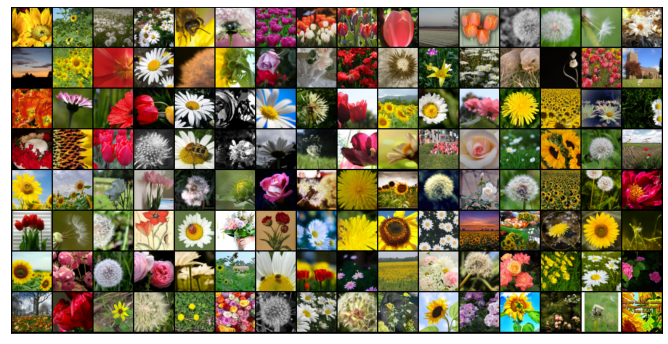

In [25]:
show_batch(train_dl)

### GPU Utilities
Here we are selecting the default machine for our project. Since it is Deep Learning project we generally prefer to use GPUs instead of CPUs,because datasets are very large, complex and its training takes a lot of computational power.

In [26]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
import torch
torch.cuda.is_available()

True

In [115]:
device = get_default_device()

device

device(type='cuda')

In [114]:
img, label = dataset[0]
img.device,img.shape

(device(type='cpu'), torch.Size([3, 224, 224]))

In [33]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

Here we are loading Training data and Validation data onto the GPU (if available)

In [34]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

### Model and Training Utilities

In [35]:
import torch.nn as nn
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):

      "Calculate loss for a batch of training data"
      images, labels = batch 
      out = self(images)                  # Generate predictions
      loss = F.cross_entropy(out, labels) # Calculate loss
      return loss
    
    def validation_step(self, batch):

      "Calculate loss and accuracy of validation data"
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = F.cross_entropy(out, labels)   # Calculate loss
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
      return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
      print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [36]:
@torch.no_grad()
def evaluate(model, val_loader):

  """ Evaluates the model's performace on the validation set """
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # Training Phase 
    model.train()
    train_losses = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    # Validation phase
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

##  ResNet Model
Increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious “vanishing gradient problem” — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient definitively small.

ResNet uses a technic called “Residual” to deal with the “vanishing gradient problem”. When stacking layers, we can use a “shortcut” to link
discontinuous layers.i.e., We can skip some layers, as follows:

![A residual block.png](http://miro.medium.com/max/640/0*rj6SSHtBfBZXKSgC.png)


In [37]:
def conv_block(in_channels, out_channels, pool=False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
      super().__init__()
      # Input: 128 x 3 x 64 x 64
      self.conv1 = conv_block(in_channels, 64) # Input: 128 x 64 x 64 x 64
      self.conv2 = conv_block(64, 128, pool=True) # Input: 128 x 128 x 32 x 32   
      self.res1 = nn.Sequential(conv_block(128, 128), # Input: 128 x 128 x 32 x 32
                                conv_block(128, 128)) # Input: 128 x 128 x 32 x 32

      self.conv3 = conv_block(128, 256, pool=True) # Input: 128 x 256 x 16 x 16
      self.conv4 = conv_block(256, 512, pool=True) # Input: 128 x 512 x 8 x 8
      self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

      self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # Input: 128 x 512 x 1 x 1
                                      nn.Flatten(),    # Input: 128 x 512
                                      nn.Dropout(0.2),
                                      nn.Linear(512, num_classes))

    def forward(self, xb):
      out = self.conv1(xb)
      out = self.conv2(out)
      out = self.res1(out) + out
      out = self.conv3(out)
      out = self.conv4(out)
      out = self.res2(out) + out
      out = self.classifier(out)
      return out  
            

In [38]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [39]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Pass one batch of input tensor through the model

In [40]:
torch.cuda.empty_cache()
for batch in train_dl:
  images, labels = batch
  print('images.shape', images.shape)
  print('images.device',images.device)
  preds = model(images)
  print('preds.shape', preds.shape)
  break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 5])


### Training

In [41]:
import torch.nn.functional as F
history = [evaluate(model, val_dl)]
history

[{'val_loss': 1.6112935543060303, 'val_acc': 0.18122506141662598}]

In [42]:
history += fit(10, 0.001, model, train_dl, val_dl, torch.optim.Adam)

Epoch [0], train_loss: 1.4846, val_loss: 1.3528, val_acc: 0.4638
Epoch [1], train_loss: 0.9486, val_loss: 0.8900, val_acc: 0.6512
Epoch [2], train_loss: 0.8435, val_loss: 0.9322, val_acc: 0.6473
Epoch [3], train_loss: 0.7746, val_loss: 0.8769, val_acc: 0.6590
Epoch [4], train_loss: 0.7382, val_loss: 0.8571, val_acc: 0.6782
Epoch [5], train_loss: 0.6899, val_loss: 0.8330, val_acc: 0.6998
Epoch [6], train_loss: 0.6177, val_loss: 0.9666, val_acc: 0.6157
Epoch [7], train_loss: 0.5683, val_loss: 0.6767, val_acc: 0.7398
Epoch [8], train_loss: 0.5398, val_loss: 0.7131, val_acc: 0.7316
Epoch [9], train_loss: 0.4860, val_loss: 0.7454, val_acc: 0.6961


In [43]:
history += fit(10, 0.001, model, train_dl, val_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.6250, val_loss: 0.8596, val_acc: 0.7194
Epoch [1], train_loss: 0.5245, val_loss: 0.5949, val_acc: 0.7906
Epoch [2], train_loss: 0.4596, val_loss: 0.6031, val_acc: 0.7813
Epoch [3], train_loss: 0.4485, val_loss: 0.7626, val_acc: 0.7623
Epoch [4], train_loss: 0.4278, val_loss: 0.5750, val_acc: 0.7886
Epoch [5], train_loss: 0.3491, val_loss: 0.5939, val_acc: 0.7819
Epoch [6], train_loss: 0.3118, val_loss: 0.8495, val_acc: 0.7174
Epoch [7], train_loss: 0.2831, val_loss: 0.5760, val_acc: 0.7975
Epoch [8], train_loss: 0.2907, val_loss: 0.7074, val_acc: 0.7693
Epoch [9], train_loss: 0.2578, val_loss: 0.6407, val_acc: 0.7707


In [44]:
history += fit(10, 0.0001, model, train_dl, val_dl, torch.optim.Adam) 
# Here we have decreased the learning rate

Epoch [0], train_loss: 0.1652, val_loss: 0.4273, val_acc: 0.8257
Epoch [1], train_loss: 0.1356, val_loss: 0.4213, val_acc: 0.8408
Epoch [2], train_loss: 0.1204, val_loss: 0.4046, val_acc: 0.8436
Epoch [3], train_loss: 0.1125, val_loss: 0.3914, val_acc: 0.8632
Epoch [4], train_loss: 0.0995, val_loss: 0.3854, val_acc: 0.8495
Epoch [5], train_loss: 0.0927, val_loss: 0.4088, val_acc: 0.8593
Epoch [6], train_loss: 0.0838, val_loss: 0.4169, val_acc: 0.8475
Epoch [7], train_loss: 0.0773, val_loss: 0.4249, val_acc: 0.8660
Epoch [8], train_loss: 0.0809, val_loss: 0.3998, val_acc: 0.8607
Epoch [9], train_loss: 0.0730, val_loss: 0.4010, val_acc: 0.8665


In [45]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs. No. of epochs')

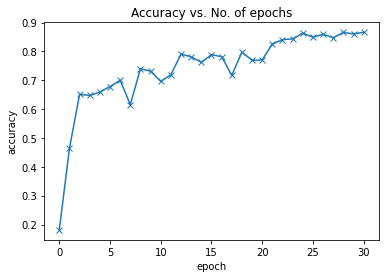

In [46]:
plot_accuracies(history)

In [47]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs no. of epochs')

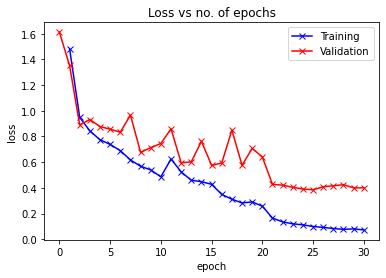

In [48]:
plot_losses(history)

### Record the results

In [49]:
"""jovian.reset()
jovian.log_dataset(image_size=64)
jovian.log_hyperparams(batch_size=128,arch='ResNet9',epochs=[10,10,10],lrs=[0.001,0.001,0.0001],
                       opt=['Adam','Adam','Adam'])
jovian.log_metrics(train_loss=history[-1]['train_loss'],
                   val_acc=history[-1]['val_acc'],
                   val_loss=history[-1]['val_loss'])"""

"jovian.reset()\njovian.log_dataset(image_size=64)\njovian.log_hyperparams(batch_size=128,arch='ResNet9',epochs=[10,10,10],lrs=[0.001,0.001,0.0001],\n                       opt=['Adam','Adam','Adam'])\njovian.log_metrics(train_loss=history[-1]['train_loss'],\n                   val_acc=history[-1]['val_acc'],\n                   val_loss=history[-1]['val_loss'])"

### Test on Individual images

In [50]:
def predict_image(img, model, classes):
  # Convert to a batch of 1
  xb = to_device(img.unsqueeze(0), device)
  # Get prediction from model
  yb = model(xb)
  # Pick index with highest probability
  _,preds = torch.max(yb, dim=1)
  # Retrive the class label
  return dataset.classes[preds[0].item()]

Target: tulip
Prediction: tulip


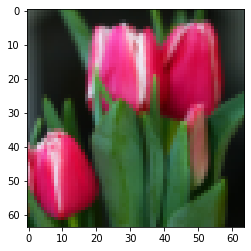

In [51]:
img, label = valid_ds[10]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


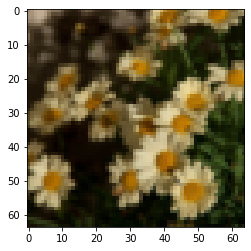

In [52]:
img, label = valid_ds[100]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


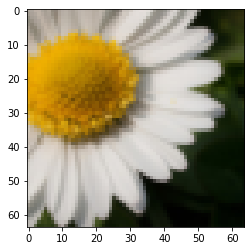

In [53]:
img, label = valid_ds[19]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: sunflower


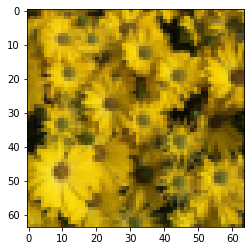

In [54]:
img, label = valid_ds[29]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


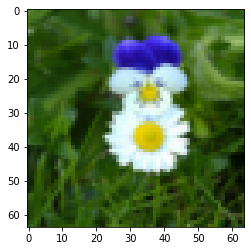

In [55]:
img, label = valid_ds[0]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


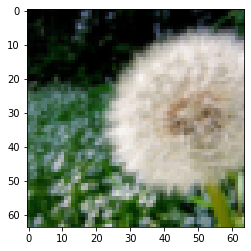

In [56]:
img, label = valid_ds[1]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


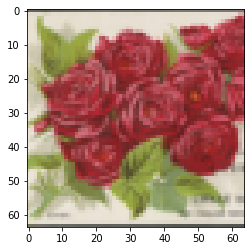

In [57]:
img, label = valid_ds[91]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: tulip
Prediction: daisy


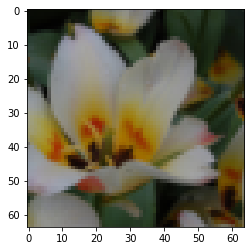

In [58]:
img, label = valid_ds[12]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


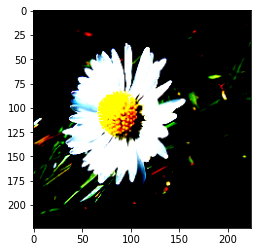

In [110]:
img, label = valid_ds[86]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


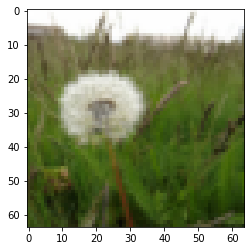

In [60]:
img, label = valid_ds[78]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: tulip
Prediction: tulip


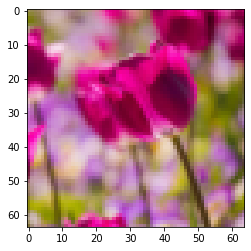

In [61]:
img, label = valid_ds[16]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


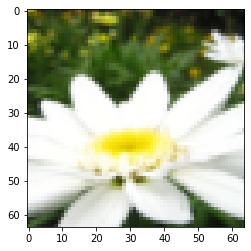

In [62]:
img, label = valid_ds[103]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


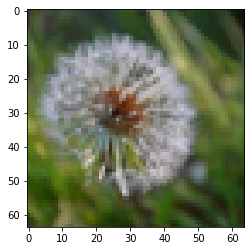

In [63]:
img, label = valid_ds[107]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: tulip
Prediction: tulip


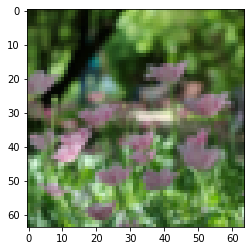

In [64]:
img, label = valid_ds[14]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: daisy


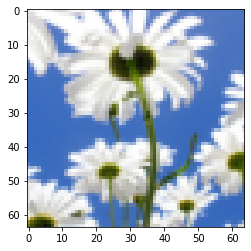

In [65]:
img, label = valid_ds[37]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: sunflower
Prediction: sunflower


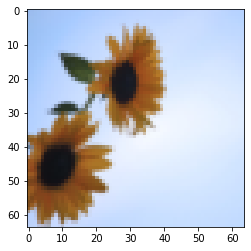

In [66]:
img, label = valid_ds[24]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


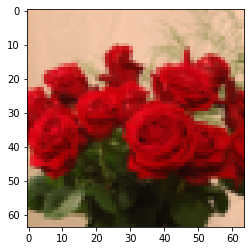

In [67]:
img, label = valid_ds[47]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


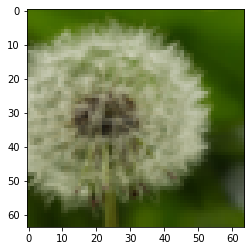

In [68]:
img, label = valid_ds[55]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


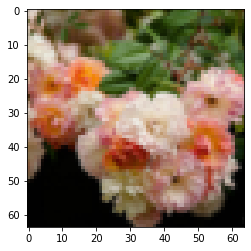

In [69]:
img, label = valid_ds[67]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: dandelion


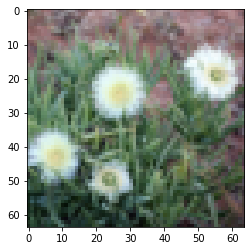

In [70]:
img, label = valid_ds[87]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


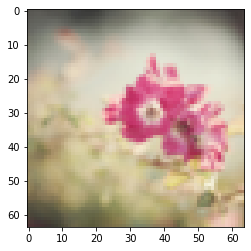

In [71]:
img, label = valid_ds[73]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: sunflower
Prediction: dandelion


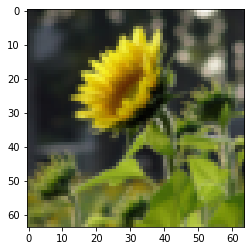

In [72]:
img, label = valid_ds[108]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: tulip
Prediction: tulip


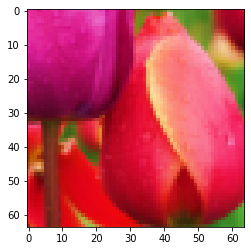

In [73]:
img, label = valid_ds[207]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


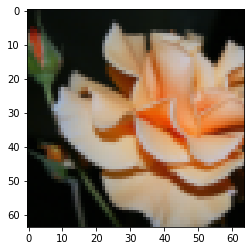

In [74]:
img, label = valid_ds[203]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: rose
Prediction: rose


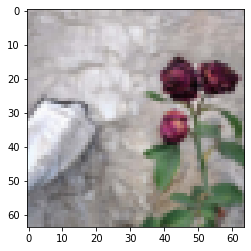

In [75]:
img, label = valid_ds[300]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: daisy
Prediction: rose


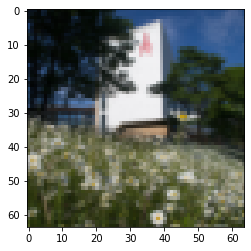

In [76]:
img, label = valid_ds[77]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: sunflower
Prediction: sunflower


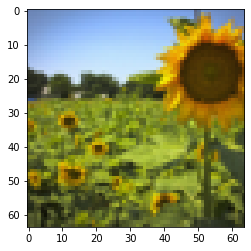

In [77]:
img, label = valid_ds[66]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

Target: tulip
Prediction: tulip


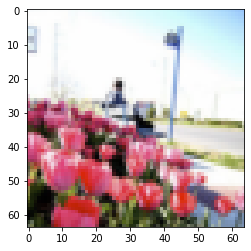

In [78]:
img, label = valid_ds[121]
plt.imshow(img.permute((1,2,0)))
pred = predict_image(img, model, dataset.classes)
print('Target:', dataset.classes[label])
print('Prediction:', pred)

## Transfer Learning Algorithm
Training a Convolutional Neural Network from scratch poses many challenges, most notably the amount of data to train the network and the amount of time it takes for training to take place.

Transfer learning is a technique that allows us to use a model trained for a certain task as a starting point for a machine learning model for a different task.

#### Modifying a Pretrained Model (ResNet34)

Transfer learning ([source](https://mc.ai/transfer-learning-with-deep-learning-machine-learning-techniques/)):
![transfer-learning](https://miro.medium.com/max/1000/1*LUFUl_8fqS97nUzpcFjgWw.png)

In [111]:
from torchvision import models
class ResNet34(ImageClassificationBase):
  def __init__(self, num_classes, pretrained=True):
    super().__init__()
    # Use a pretrained model
    self.network = models.resnet34(pretrained=pretrained)
    # Replace last layer
    self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

  def forward(self, xb):
    return self.network(xb)  

In [112]:
model = to_device(ResNet34(len(dataset.classes), pretrained=True), device)

In [113]:
model

ResNet34(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

### TENSOR TRANSFORMATION
In this step, Image Data is being converted into a PyTorch Tensor. 

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [83]:
import torchvision.transforms as tt
img_size = 224
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

dataset =ImageFolder(data_dir, tt.Compose([tt.Resize(img_size), 
                                           tt.RandomCrop(img_size), 
                                           tt.ToTensor(), 
                                           tt.Normalize(*imagenet_stats)]))


### PREPARING FOR TRAINING-VALIDATION DATASET SPLITTING, BATCHING OF DATASET AND LOADING OF DATA ONTO DEVICE
Dataset is divided into two datasets
1. Training Dataset
2. Validation Dataset

Sometimes the dataset is too large to be stored in `GPU` and sometimes even in `CPUs`. So in order to train the model. The training dataset is broken into batches of data and each `batch` trained one by one until that Training set is completely exhausted, and iteration in which one training set is completely exhausted is known as one `epoch`. In this step we will divide Training and Validation datasets in batches.

In [84]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

train_ds, valid_ds = random_split(dataset,[train_size,val_size])
len(train_ds),len(valid_ds)

## Creating Data Loaders

batch_size = 64
train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory =True)
val_dl = DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory =True)

In [85]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [86]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [89]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 1.986761450767517, 'val_acc': 0.1986132115125656}]

In [91]:
history += fit_one_cycle(3, 0.001, model, train_dl,
              val_dl, weight_decay=0.01,
              grad_clip=0.1, opt_func=torch.optim.Adam )

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.6444, val_loss: 12.3692, val_acc: 0.3806


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.6035, val_loss: 0.5794, val_acc: 0.7955


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.3472, val_loss: 0.3072, val_acc: 0.8888


In [92]:
history += fit_one_cycle(3, 0.001, model, train_dl,
              val_dl, weight_decay=0.01,
              grad_clip=0.1, opt_func=torch.optim.Adam )

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.4775, val_loss: 2.0692, val_acc: 0.4687


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.6216, val_loss: 0.7337, val_acc: 0.7292


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.3936, val_loss: 0.3844, val_acc: 0.8604


In [93]:
history += fit_one_cycle(8, 0.001, model, train_dl,
              val_dl, weight_decay=0.01,
              grad_clip=0.1, opt_func=torch.optim.Adam )

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.3212, val_loss: 0.6909, val_acc: 0.7807


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.4896, val_loss: 1.1232, val_acc: 0.6032


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.6577, val_loss: 0.8514, val_acc: 0.6553


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.5845, val_loss: 0.6709, val_acc: 0.7693


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.5356, val_loss: 0.6660, val_acc: 0.7373


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.4120, val_loss: 0.4220, val_acc: 0.8673


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.2998, val_loss: 0.3268, val_acc: 0.8935


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.2376, val_loss: 0.3095, val_acc: 0.8904


In [94]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs. No. of epochs')

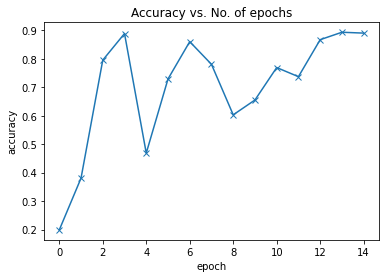

In [95]:
plot_accuracies(history) # Shows a increasing accuracy with epochs trend

In [96]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs no. of epochs')

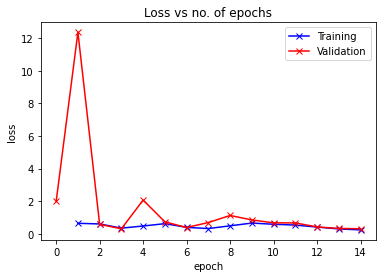

In [97]:
plot_losses(history) # Shows a beautiful trend of Training loss vs Validation loss (No overfiting and underfitting)

In [98]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

def denormalize(images, means, stds):
    if len(images.shape) == 3:
        images = images.unsqueeze(0)
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_image(img_tensor, label):
    print('Label:', dataset.classes[label], '(' + str(label) + ')')
    img_tensor = denormalize(img_tensor, *imagenet_stats)[0].permute((1, 2, 0))
    plt.imshow(img_tensor)

Label: tulip (4)
Predicted: tulip


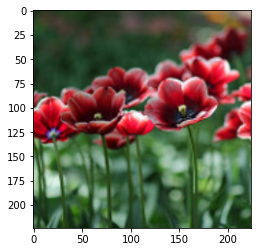

In [99]:
img, label = valid_ds[0]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: daisy (0)
Predicted: daisy


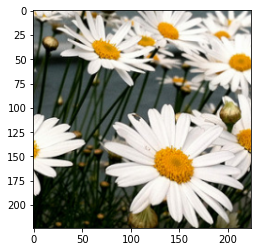

In [100]:
img, label = valid_ds[100]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: dandelion (1)
Predicted: dandelion


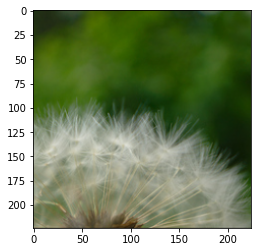

In [101]:
img, label = valid_ds[67]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: daisy (0)
Predicted: daisy


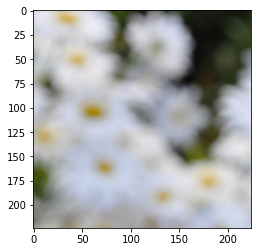

In [102]:
img, label = valid_ds[103]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: rose (2)
Predicted: rose


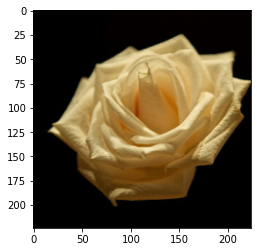

In [103]:
img, label = valid_ds[213]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: dandelion (1)
Predicted: dandelion


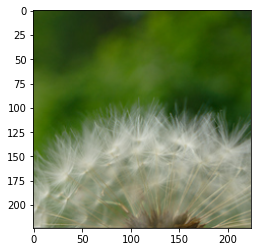

In [104]:
img, label = valid_ds[67]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: dandelion (1)
Predicted: daisy


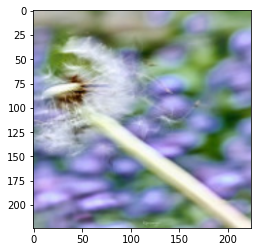

In [105]:
img, label = valid_ds[87]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: dandelion (1)
Predicted: tulip


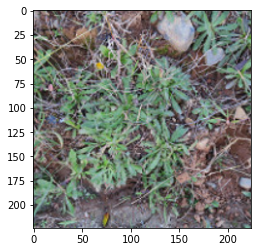

In [106]:
img, label = valid_ds[90]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: sunflower (3)
Predicted: sunflower


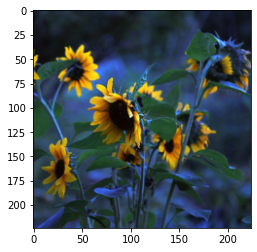

In [107]:
img, label = valid_ds[222]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)

Label: dandelion (1)
Predicted: dandelion


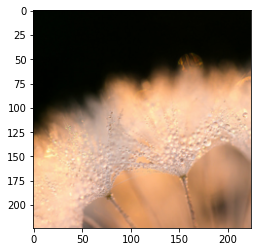

In [108]:
img, label = valid_ds[43]
show_image(img, label)
pred = predict_image(img, model, dataset.classes)
print('Predicted:', pred)